In [70]:
%reset
import numpy as np
import pandas as pd

x1    =    np.array([-1.2,-1.2,-1.2,0,0,0,1.2,1.2,1.2])
x2    =    np.array([-1.2,0,1.2,-1.2,0,1.2,-1.2,0,1.2])
y     =   np.array([.858,    3.156,    3.644,    4.281,    3.481,    3.918,    4.136,    3.364,    4.018])

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [71]:
#  ingnore future warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [72]:
# create a df from the variables

df = pd.DataFrame({'x1':x1, 'x2':x2,'y':y})
#df

In [73]:
#Fit the OLS regression surface model

from statsmodels.formula.api import ols

# Creating the linear model, produce the fit, and print out the summmary of the regression model
model=ols('y~x1+x2+(x1*x2)',data=df)
results=model.fit()
print(results.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.425  
Dependent Variable: y                AIC:                23.8681
Date:               2024-02-09 12:32 BIC:                24.6570
No. Observations:   9                Log-Likelihood:     -7.9341
Df Model:           3                F-statistic:        2.971  
Df Residuals:       5                Prob (F-statistic): 0.136  
R-squared:          0.641            Scale:              0.61449
-----------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-----------------------------------------------------------------
Intercept      3.4284    0.2613  13.1208  0.0000   2.7568  4.1001
x1             0.5361    0.2667   2.0103  0.1006  -0.1494  1.2216
x2             0.3201    0.2667   1.2004  0.2837  -0.3654  1.0057
x1:x2         -0.5042    0.2722  -1.8523  0.1232  -1.2038  0.1955
-----------------------------------

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [74]:
print("The regression equation is")
print("stack =",f'{results.params["Intercept"]:.3}' ,"+",f'{results.params["x1"]:.3}',"x1","+",f'{results.params["x2"]:.3}',"x2","+",f'{results.params["x1:x2"]:.3}',"x1*x2")

The regression equation is
stack = 3.43 + 0.536 x1 + 0.32 x2 + -0.504 x1*x2


In [75]:
# prodcue the ANOVA table

from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(results)
print(anova_results)

           df    sum_sq   mean_sq         F    PR(>F)
x1        1.0  2.483267  2.483267  4.041195  0.100611
x2        1.0  0.885504  0.885504  1.441043  0.283737
x1:x2     1.0  2.108304  2.108304  3.430991  0.123185
Residual  5.0  3.072441  0.614488       NaN       NaN


In [76]:
# importing the required library for plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
results.fittedvalues

0    1.674944
1    2.785111
2    3.895278
3    3.044278
4    3.428444
5    3.812611
6    4.413611
7    4.071778
8    3.729944
dtype: float64

Text(0, 0.5, 'Fitted Lift/Drag ratio, yhat')

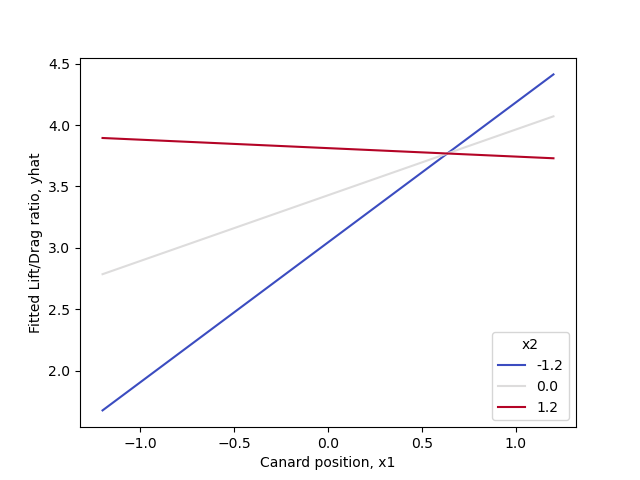

In [78]:
# Plot the Fitted lift/Drag from Example 8.1.5.1

fig, ax = plt.subplots()
sns.lineplot(x=df["x1"],y=results.fittedvalues,hue=df["x2"],palette="coolwarm")
plt.xlabel("Canard position, x1")
plt.ylabel("Fitted Lift/Drag ratio, yhat")

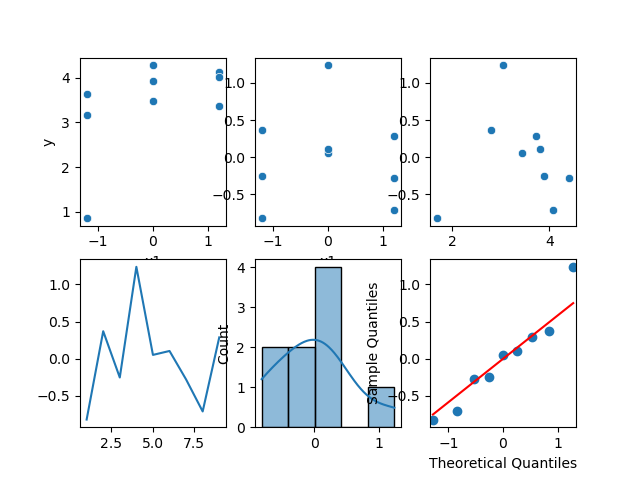

In [79]:
import statsmodels.api as sm

#  Assumptions review with x1 and 6-plot residual review
figure2, axis2 = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=df["x1"],y=df["y"],data=df,ax=axis2[0,0])
sns.scatterplot(x=df["x1"],y=results.resid,data=df,ax=axis2[0,1])
sns.scatterplot(x=results.predict(),y=results.resid,data=df,ax=axis2[0,2])
sns.lineplot(x=np.arange(1,10,1),y=results.resid,data=df,ax=axis2[1,0])
sns.histplot(x=results.resid, stat='count',kde=True,ax=axis2[1,1])
sm.qqplot(results.resid,line='s',ax=axis2[1,2])
plt.show()

Text(0, 0.5, 'Fitted Lift/Drag ratio, yhat')

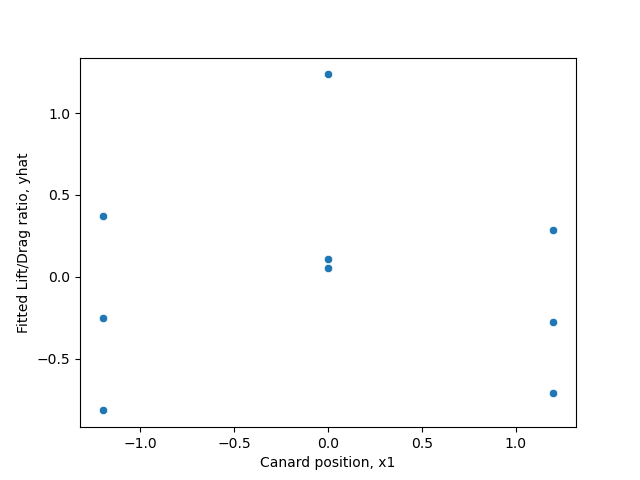

In [80]:
fig, ax = plt.subplots()
sns.scatterplot(x=df["x1"],y=results.resid,data=df)
plt.xlabel("Canard position, x1")
plt.ylabel("Fitted Lift/Drag ratio, yhat")

In [84]:
# new regression with squared x1 term to fit residuals better

# Creating the linear model, produce the fit, and print out the summmary of the regression model
model1=ols('y~x1+x2+I(x1*x1)+I(x1*x2)',data=df)
results1=model1.fit()
print(results1.summary2())

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.509  
Dependent Variable: y                AIC:                22.4429
Date:               2024-02-09 12:35 BIC:                23.4290
No. Observations:   9                Log-Likelihood:     -6.2214
Df Model:           4                F-statistic:        3.071  
Df Residuals:       4                Prob (F-statistic): 0.151  
R-squared:          0.754            Scale:              0.52497
-----------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-----------------------------------------------------------------
Intercept      3.8933    0.4183   9.3071  0.0007   2.7319  5.0548
x1             0.5361    0.2465   2.1749  0.0953  -0.1483  1.2205
x2             0.3201    0.2465   1.2988  0.2638  -0.3642  1.0045
I(x1 * x1)    -0.4843    0.3558  -1.3611  0.2451  -1.4721  0.5036
I(x1 * x2)    -0.5042    0.2516  -2

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


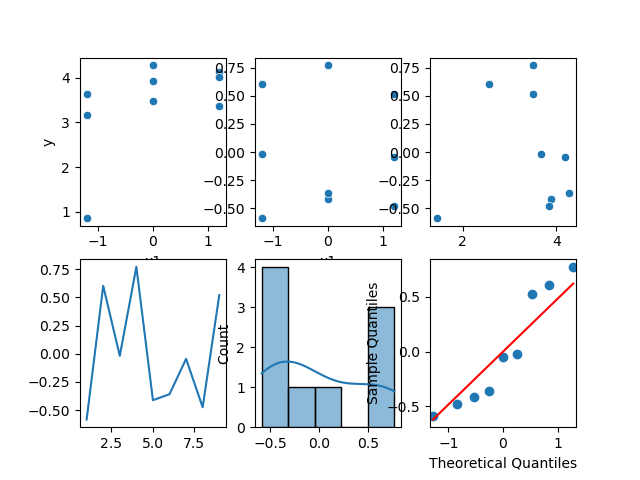

In [85]:
#  Assumptions review with x1 and 6-plot residual review
figure2, axis2 = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=df["x1"],y=df["y"],data=df,ax=axis2[0,0])
sns.scatterplot(x=df["x1"],y=results1.resid,data=df,ax=axis2[0,1])
sns.scatterplot(x=results1.predict(),y=results1.resid,data=df,ax=axis2[0,2])
sns.lineplot(x=np.arange(1,10,1),y=results1.resid,data=df,ax=axis2[1,0])
sns.histplot(x=results1.resid, stat='count',kde=True,ax=axis2[1,1])
sm.qqplot(results1.resid,line='s',ax=axis2[1,2])
plt.show()

Text(0, 0.5, 'Fitted Lift/Drag ratio, yhat')

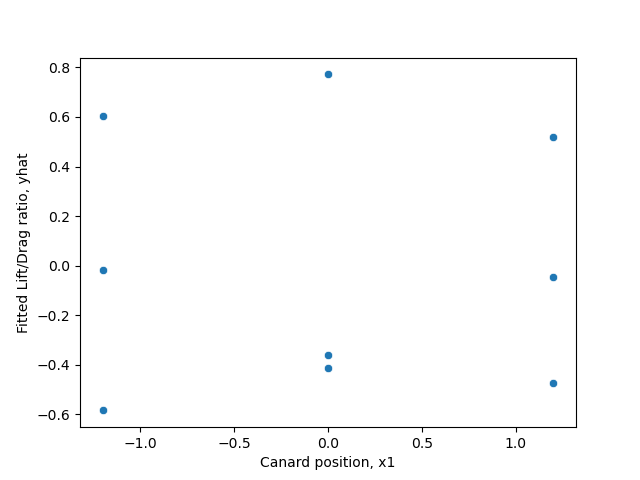

In [86]:
fig, ax = plt.subplots()
sns.scatterplot(x=df["x1"],y=results1.resid,data=df)
plt.xlabel("Canard position, x1")
plt.ylabel("Fitted Lift/Drag ratio, yhat")

Text(0, 0.5, 'Fitted Lift/Drag ratio, yhat')

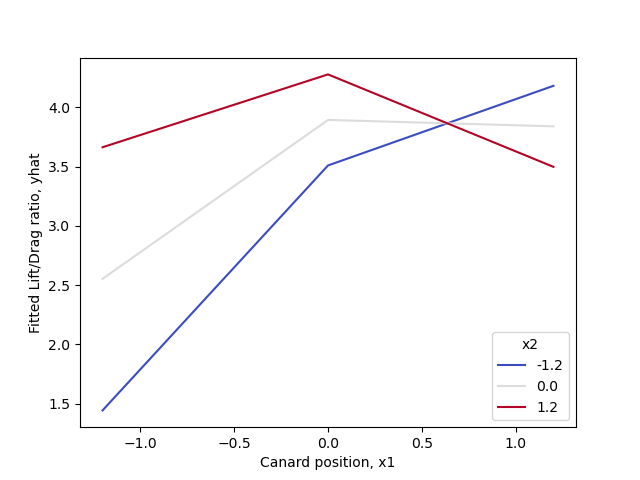

In [87]:
fig, ax = plt.subplots()
sns.lineplot(x=df["x1"],y=results1.fittedvalues,hue=df["x2"],palette="coolwarm")
plt.xlabel("Canard position, x1")
plt.ylabel("Fitted Lift/Drag ratio, yhat")